In [10]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using StatsBase

In [35]:
rng = Random.default_rng();

# graph parameters
n = 50
p = 0.7
eta = 0.2

# planted ranking
planted_ranking = randperm(rng,n)

# graph model
type = "MUN" 

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_ranking)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_ranking)
end

# number of batches and MC runs
n_batch = 6;
n_rep = 10;

D = benchmark_syncrank(meta_g,planted_ranking, n_batch, n_rep, rng);

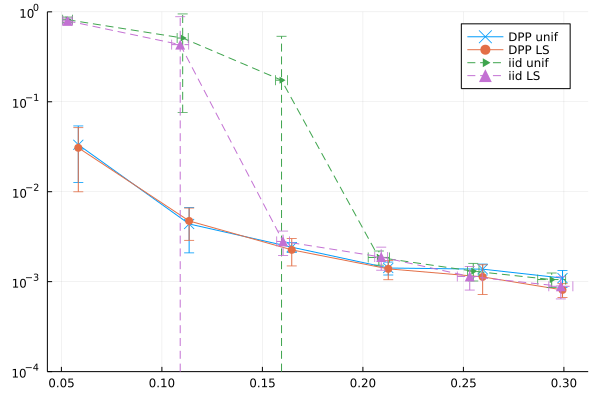

In [37]:
# DPP unif
x = D["percent_edges_dpp"]
y = D["err_dpp_unif"]
y_er = D["err_dpp_unif_std"]
plot(x,y,yerror=y_er,yaxis=:log, labels = "DPP unif",markerstrokecolor=:auto,markershape=:xcross,markersize = 5)

# DPP LS
x = D["percent_edges_dpp"]
y = D["err_dpp_lev"]
y_er = D["err_dpp_lev_std"]
plot!(x,y,yerror=y_er,yaxis=:log, labels = "DPP LS",markerstrokecolor=:auto,markershape=:circle,markersize = 5)

# iid unif
x = D["percent_edges_iid_unif"]
y = D["err_iid_unif"]
x_er = D["percent_edges_iid_unif_std"]
y_er = D["err_iid_unif_std"]
plot!(x,y,xerror=x_er,yerror=y_er,yaxis=:log, labels = "iid unif",markerstrokecolor=:auto,markersize = 5,linestyle=:dash,markershape=:rtriangle)

# iid LS
x = D["percent_edges_iid_lev"]
y = D["err_iid_lev"]
x_er = D["percent_edges_iid_lev_std"]
y_er = D["err_iid_lev_std"]
plot!(x,y,xerror=x_er,yerror=y_er,yaxis=:log, labels = "iid LS",markerstrokecolor=:auto,markersize = 5,linestyle=:dash,markershape=:utriangle)

ylims!((1e-4,1))

In [ ]:
foldername = "figures/"
name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"EigenDistance_norm.pdf"
savefig(foldername*name)

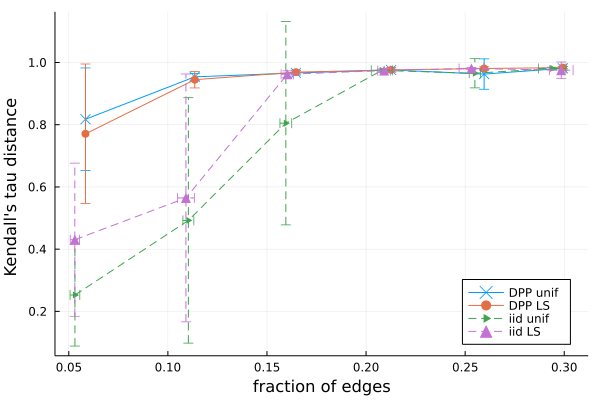

In [38]:
# DPP unif
x = D["percent_edges_dpp"]
y = D["tau_dpp_unif"]
y_er = D["tau_dpp_unif_std"]
plot(x,y,yerror=y_er, labels = "DPP unif",markerstrokecolor=:auto,markershape=:xcross,markersize = 5)

# DPP LS
x = D["percent_edges_dpp"]
y = D["tau_dpp_lev"]
y_er = D["tau_dpp_lev_std"]
plot!(x,y,yerror=y_er, labels = "DPP LS",markerstrokecolor=:auto,markershape=:circle,markersize = 5)

# iid unif
x = D["percent_edges_iid_unif"]
y = D["tau_iid_unif"]
x_er = D["percent_edges_iid_unif_std"]
y_er = D["tau_iid_unif_std"]
plot!(x,y,xerror=x_er,yerror=y_er, labels = "iid unif",markerstrokecolor=:auto,markersize = 5,linestyle=:dash,markershape=:rtriangle)

# iid LS
x = D["percent_edges_iid_lev"]
y = D["tau_iid_lev"]
x_er = D["percent_edges_iid_lev_std"]
y_er = D["tau_iid_lev_std"]
plot!(x,y,xerror=x_er,yerror=y_er, labels = "iid LS",markerstrokecolor=:auto,markersize = 5,linestyle=:dash,markershape=:utriangle,legend=:bottomright)


xlabel!("fraction of edges")
ylabel!("Kendall's tau distance ")


In [ ]:

foldername = "figures/"
name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"Kendall_norm.pdf"
savefig(foldername*name)

In [25]:
singular = true
B = magnetic_incidence(meta_g)
L = B * B'

# normalization
normalize_Lap!(L)
normalize_meta_g!(meta_g)

# recovered ranking full Laplacian
ranking_full = syncrank(L, meta_g; singular)
tau_full = corkendall(planted_ranking, ranking_full)